In [1]:

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import xarray as xr

import plotly.express as px

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [2]:
from scripts.paths import *
from scripts.dicts import *



Go to #Figure 6 for plotting of Figure 6


In [3]:
# path_annual_racmo_files = "/Volumes/imau01/rapid/RACMO2.3p2/FGRN055/Downscaling_GR/Annual/"

In [6]:
# fname = pathIMAU02 + "RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc"
# mask1 = xr.open_dataset(fname)

# fname = (
#     pathIMAU02
#     + "RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24_copy.nc"
# )
# mask_regions = xr.open_dataset(fname)




In [33]:
# mask1['regions'] = mask1['LSM'].copy(deep=True)
# mask1['regions'].values = mask_regions.section_numbers_adjusted



make regions data array

In [8]:
# da_regions = xr.zeros_like(mask1['LSM']) 
# da_regions.values = (mask1['LSM'].values*mask_regions['section_numbers_adjusted'].values)
# da_regions = da_regions.where(da_regions>0)
# da_regions.name = 'region'


Import relative shares per regions annual

In [9]:
# df_per_region_rel_reform = pd.read_excel(f'{pathDataProcessed}Annual timeseries per sector/Sector_timeseries.xlsx', sheet_name='Relative', index_col=0).rename(columns=dict_shorter_name)/100
# # give name to columns
# df_per_region_rel_reform.columns.name = 'FW component'
# df_per_region_rel_reform.reset_index(inplace=True)
# df_rel = df_per_region_rel_reform.set_index([ 'Basins']).stack().reset_index().rename(columns={'level_2':'FW component', 0:'%'})
# df_rel['%'] = df_rel['%']*100

## Calculate Melt over Accumulation

first import all the racmo annual files

In [13]:
import os
import xarray as xr
import gzip
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm

def plot_first_timestep_in_directory(directory):
    datasets = {}
    # Loop through all files in the specified directory
    for filename in tqdm(os.listdir(directory)):
        if filename.endswith(".nc.gz") or filename.endswith(".nc"):
            # Full path to the file
            filepath = os.path.join(directory, filename)
            
            # Create a temporary unzipped file path
   
            # Open the dataset using xarray
            ds = xr.open_dataset(filepath, decode_times=False)
            
            # Get the first time step of the single variable in the dataset
            variable_name = list(ds.data_vars.keys())[0]  # Assumes only one variable per file
            datasets[variable_name] = ds
            ds.isel(time=0)[variable_name].plot.imshow(robust=True, figsize=(3,3))
            
            # Display the plot
            plt.title(f"{variable_name}")
            plt.show()
    return datasets


In [11]:

# # Example usage:
# directory = path_annual_racmo_files
# datasets = plot_first_timestep_in_directory(directory)


In [12]:
def fix_years_since_ref(ds, ref_year=1958):
    # Extract the time values (years since reference)
    years_since_ref = ds['time'].values
    actual_years = ref_year + years_since_ref.astype(int)
    new_dates = np.array([np.datetime64(f'{year}-01-01') for year in actual_years])
    ds['time'] = new_dates
    return ds
    
def fix_days_since_ref(ds, ref_year=1958):
    # Extract the time values (years since reference)
    days_since_ref = ds['time'].values
    actual_years = (ref_year + days_since_ref/365.).astype(int)
    new_dates = np.array([np.datetime64(f'{year}-01-01') for year in actual_years])
    ds['time'] = new_dates
    return ds

def fix_time_since_ref(ds, ref_year=1958):
    # Extract the time values (years since reference)
    if 'units' in ds['time'].attrs:
        units = ds['time'].attrs['units']
    else: 
        units = ""
    if 'DAYS' in units:
        ds = fix_days_since_ref(ds, ref_year)
    elif 'YEARS' in units:
        ds = fix_years_since_ref(ds, ref_year)
    else:
        print("Not converted")
    return ds



In [ ]:
# dss_mean_per_region = {}

# for var in tqdm(datasets.keys()):
#     dss_mean_per_region[var] = datasets[var][var].where(mask1.Icemask==1).groupby(mask1['regions']).mean()
#     fix_time_since_ref(dss_mean_per_region[var])

combine racmo variables per region and percent of total volume

In [14]:
# df_racmo_vars = pd.DataFrame(index= np.arange(1,8), columns = dss_mean_per_region.keys())

# start = '1990-01-01'
# end = '2023-12-01'
# # select all years since 1990
# for var in dss_mean_per_region.keys():
#     df_racmo_vars[var] = dss_mean_per_region[var].sel(time=slice(start,end)).mean(dim='time').to_dataframe()
# # df_racmo_vars


In [15]:
# df_racmo_vars_regions = df_racmo_vars.reset_index()
# df_racmo_vars_regions['Basins'] = df_racmo_vars_regions['index'].map(dict_sections)
# melt = df_racmo_vars_regions['snowmeltcorr']+(df_racmo_vars_regions['precipcorr']- df_racmo_vars_regions['snowfallcorr'])
# acc = df_racmo_vars_regions['snowfallcorr']+df_racmo_vars_regions['sublcorr']
# df_racmo_vars_regions['melt_acc'] = melt/acc    # drop column 'index'
# df_racmo_vars_regions = df_racmo_vars_regions.drop(columns=['index'])
# # df_per_region_rel.rename(columns={'Unnamed: 0':'Basins'}).set_index('Basins').T.index
# df_per_region_rel_FW = df_per_region_rel.rename(columns={'Unnamed: 0':'Flux'}).set_index('Flux')
# df_per_region_rel_FW.columns.name = 'Basins'
# df_per_region_rel_FW = df_per_region_rel_FW.T
# df_per_region_rel_FW['SID_GrIS']= df_per_region_rel_FW['Solid Ice Discharge']/df_per_region_rel_FW['Liquid Runoff Ice Sheet']
# df_per_region_rel_FW['SID_Tundra']= df_per_region_rel_FW['Solid Ice Discharge']/df_per_Bregion_rel_FW['Liquid Runoff Tundra']
# df_racmo_vars_FW_rel = pd.merge(df_racmo_vars_regions.set_index('Basins'),df_per_region_rel_FW, left_index=True, right_index=True)

# FIGURE 6

In [4]:
# df_racmo_vars_FW_rel.to_csv(pathDataProcessed+'MOA_plot_input_mean_per_region_1990-2023.csv')
df_racmo_vars_FW_rel = pd.read_csv(pathDataProcessed+'MOA_plot_input_mean_per_region_1990-2023.csv')

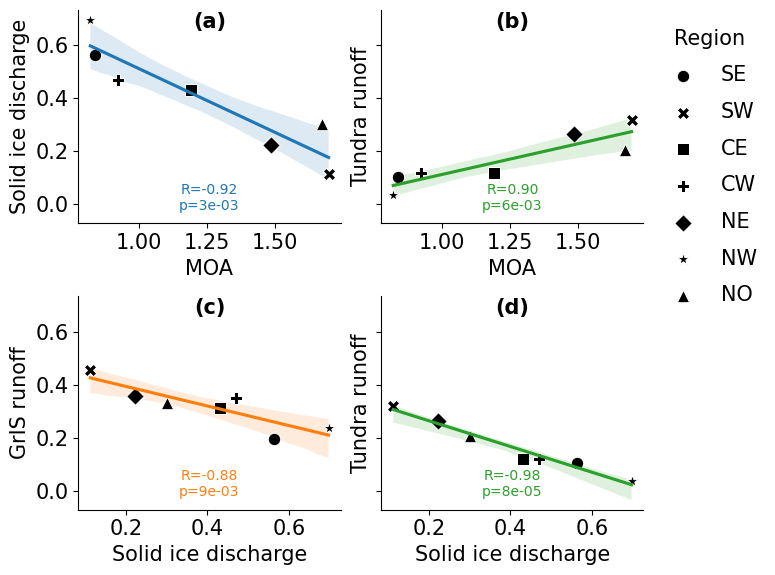

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


plt.rcParams.update({'font.size': 15})

regions = ['SE', 'SW', 'CE', 'CW', 'NE', 'NW', 'NO']
markers = ['o', 'X', 's', 'P', 'D', '*', '^']

region_markers = dict(zip(regions, markers))

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharey=True,sharex='row')


# Define the pairs of variables to plot
plot_pairs = [
    ('MOA', 'Solid ice discharge',  '(a)', 'tab:blue'),
    ('MOA','Tundra runoff',  '(b)', 'tab:green'),
    ('Solid ice discharge', 'GrIS runoff', '(c)', 'tab:orange'),
    ('Solid ice discharge', 'Tundra runoff', '(d)', 'tab:green'),
]

name_df = {'MOA':'melt_acc', 'GrIS runoff':'Liquid Runoff Ice Sheet', 'Tundra runoff':'Liquid Runoff Tundra', 'Solid ice discharge':'Solid Ice Discharge'}

# add (a), (b), (c), (d) to each subplot
# Plot each pair
for ax, (x_var, y_var, title, color_reg) in zip(axs.flatten(), plot_pairs):
    sns.regplot(data=df_racmo_vars_FW_rel, x=name_df[x_var], y=name_df[y_var], scatter=False, ax=ax, color=color_reg)


    # Calculate correlation
    r, p = pearsonr(df_racmo_vars_FW_rel[name_df[x_var]], df_racmo_vars_FW_rel[name_df[y_var]])
    ax.text(0.5, 0.05, f'R={r:.2f}\np={p:.0e}', transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color=color_reg)
    
    for region in regions:
        subset = df_racmo_vars_FW_rel[df_racmo_vars_FW_rel['Basins'] == region]
        sns.scatterplot(data=subset, x=name_df[x_var], y=name_df[y_var], marker=region_markers[region], label=region, ax=ax, color='black', legend=False, s=80)
   
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # set transparent background of ax
    ax.patch.set_alpha(0)
    ax.text(0.5, .99, title, transform=ax.transAxes, verticalalignment='top', horizontalalignment='center', color='black', fontweight='bold')

    

# Add legend only to the top-right subplot
handles, labels = axs[0, 1].get_legend_handles_labels()
axs[0, 1].legend(handles, labels, loc='upper left',bbox_to_anchor=(1., 1), title='Region',frameon=False, labelspacing=0.8)
plt.tight_layout(h_pad=-1, w_pad=0.5)


plt.show()